In [1]:
#TDL
"""
Optimise runtime somehow (just make it faster)
define list of options
make all the the options possible in code (implement alternative algorithms)
configure pipeline so it takes configuration as a parameter
set up grid search
???
nobel prize
"""

'\nOptimise runtime somehow (just make it faster)\ndefine list of options\nmake all the the options possible in code (implement alternative algorithms)\nconfigure pipeline so it takes configuration as a parameter\nset up grid search\n???\nnobel prize\n'

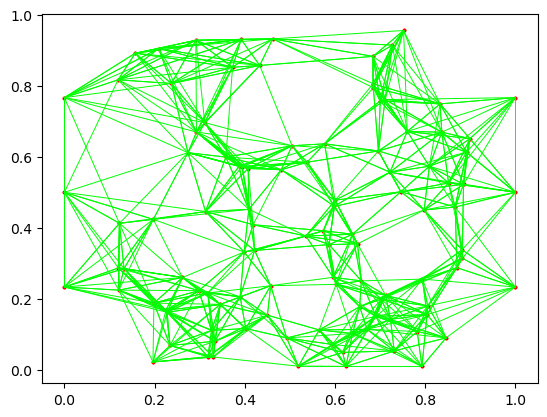

(array([[1., 0., 0.]]), array([[ 0.70205328, -0.        ,  0.        ]])) 0
(array([[1., 0., 0.]]), array([[ 0.70205328, -0.        ,  0.        ]])) 0


In [2]:
#imports
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

from non_layered_neural_net import nlnn



In [3]:
#Run_hyperparameters
training_run = 2
neuron_count=1000
connection_probability_dropoff=3
connection_probability_scalar=0.00003
input_layer_connectivity_multiplyer=50
output_layer_connectivity_multiplyer=20
weight_initialisation_range=2
distances_from_input_output_layer_to_main_neuron_field=0.1
hidden_neuron_connections = 7
input_neuron_connections = 10
output_neuron_connections = 10
inference_steps = 8

n_closes_neurons_connection_probability="connection_prob" #"n_closest"
activation_function="sigmoid" #relu

generation_size=12 
n_survivors=3
mutation_range="dynamic"
training_set_size=1000
mutation_range_reducing_interval="none"
mutation_range_reducing_factor="none"

reducing_mutaiton_range="no"
stochastic_mutation_range="yes"
multiple_training_sets="yes"
keep_best_of_n_generations_keep_n_best="keep_n_best"
allow_topological_modification="no"
non_uniform_distribution_in_stochastic_mutation_range="no"


In [ ]:
config = {         "training_run":training_run,
                   "neuron_count":neuron_count,
                   "connection_probability_dropoff":connection_probability_dropoff,
                   "connection_probability_scalar":connection_probability_scalar,
                   "input_layer_connectivity_multiplyer":input_layer_connectivity_multiplyer,
                   "output_layer_connectivity_multiplyer":output_layer_connectivity_multiplyer,
                   "weight_initialisation_range":weight_initialisation_range,
                   "n_closes_neurons_connection_probability":n_closes_neurons_connection_probability,
                   "hidden_neuron_connections" : hidden_neuron_connections,
                   "input_neuron_connections" : input_neuron_connections,
                   "output_neuron_connections" : output_neuron_connections,
                   "inference_steps" : inference_steps,
                   "activation_function":activation_function,
                   "generation_size":generation_size,
                   "n_survivors":n_survivors,
                   "mutation_range":mutation_range,
                   "training_set_size":training_set_size,
                   "mutation_range_reducing_interval":mutation_range_reducing_interval,
                   "mutation_range_reducing_factor":mutation_range_reducing_factor,
                   "reducing_mutaiton_range":reducing_mutaiton_range,
                   "stochastic_mutation_range":stochastic_mutation_range,
                   "multiple_training_sets":multiple_training_sets,
                   "allow_topological_modification":allow_topological_modification
            }

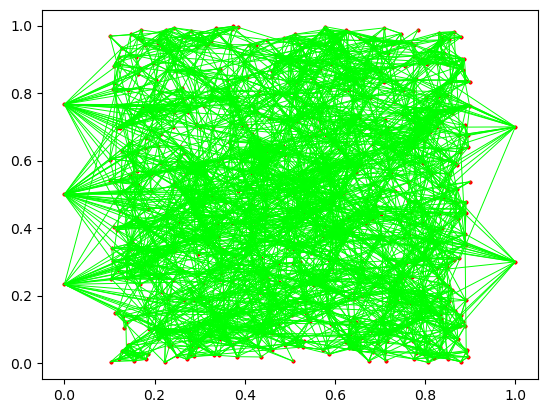

In [4]:
net = nlnn(hidden_neurons= config["neuron_count"], input_neurons = 3, output_neurons = 2)
if config["n_closes_neurons_connection_probability"] == "connection_prob"
    net.initialise_structure(connection_probability_dropoff=config["connection_probability_dropoff"], connection_probabily_scalar=config["connection_probability_scalar"], input_connection_prob_multiplyer = config["input_layer_connectivity_multiplyer"], output_connection_prob_multiplyer = config["output_layer_connectivity_multiplyer"])
elif config["n_closes_neurons_connection_probability"] == "n_closest"¨
    net.initialise_structure_n_closest(hidden_neuron_connections = config["hidden_neuron_connections"], input_neuron_connections = config["input_neuron_connections"], output_neuron_connections = config["output_neuron_connections"])

net.display_net()

In [5]:
#load dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [6]:
#setting up conventional model 
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_shape=(28*28,), activation='sigmoid'))
#model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


Metal device set to: Apple M1 Pro


2023-03-20 19:52:42.193079: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-20 19:52:42.193235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
#model.fit(mod_x_train, one_hot_y_train, epochs=10, batch_size=32)

In [8]:
#evaluate model
#accuracy = model.evaluate(mod_x_test, one_hot_y_test)
#print(accuracy)

In [9]:
#try on all classes
#one hot encode
def one_hot_encode(x):
    out = np.zeros((len(x), max(x)+1))
    for i in range(len(x)):
        out[i][x[i]] = 1
    return out

y_train_ohe = one_hot_encode(train_y)
y_test_ohe = one_hot_encode(test_y)
#flatten images
x_train = train_X.reshape(len(train_X), 28*28)
x_test = test_X.reshape(len(test_X), 28*28)

x_test = np.array_split(x_test, 10)
y_test_ohe = np.array_split(y_test_ohe, 10)


model_all = Sequential()
#model_all.add(Dense(3, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model_all.add(Dense(10, activation='softmax'))

# compile the keras model
model_all.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

#model_all.fit(x_train, y_train_ohe, epochs=10, batch_size=32)

In [10]:
#evaluate model
"""
print(x_test[2].shape)
print(y_test_ohe[2].shape)

print(x_train.shape)
print(y_train_ohe.shape)
accuracy = model.evaluate(x_test, y_test_ohe)
print(accuracy)"""

'\nprint(x_test[2].shape)\nprint(y_test_ohe[2].shape)\n\nprint(x_train.shape)\nprint(y_train_ohe.shape)\naccuracy = model.evaluate(x_test, y_test_ohe)\nprint(accuracy)'

In [11]:
#setting up evolutionary pipeline
performance_over_time = []
#creating initial population
population_size = config["generation_size"]
def create_population(population_size):
    population = []
    print("Creating networks")
    for i in range(population_size):
        net = nlnn(output_neurons = 10, hidden_neurons = config["neuron_count"])
        if config["n_closes_neurons_connection_probability"] == "connection_prob"
            net.initialise_structure(connection_probability_dropoff=config["connection_probability_dropoff"], connection_probabily_scalar=config["connection_probability_scalar"], input_connection_prob_multiplyer = config["input_layer_connectivity_multiplyer"], output_connection_prob_multiplyer = config["output_layer_connectivity_multiplyer"])
        elif config["n_closes_neurons_connection_probability"] == "n_closest"¨
            net.initialise_structure_n_closest(hidden_neuron_connections = config["hidden_neuron_connections"], input_neuron_connections = config["input_neuron_connections"], output_neuron_connections = config["output_neuron_connections"])
        #net.initialise_randomly()
        population.append(net)
        print("|", end="")

    print("done!")
    return population


networks = create_population(population_size)

Creating networks
||||||||||||done!


In [12]:
def get_perf(t):
        return t[0]

#measure performance of all the networks
def evaluate_performance(population, x, y):
    performances = []
    print("evaluating performances", end="")
    for net in population:
        predictions = net.predict(x, config["inference_steps"])[0]
        correct_count = len(x)-(np.sum(np.abs(y - predictions))/2)
        performances.append((correct_count/len(x), net))
        #print(correct_count/len(x))
        print("|", end="")
    print(" done!", end=" ")
    #sort by best performance
    performances.sort(key = get_perf, reverse = True)
    return performances

evaluated_networks = evaluate_performance(networks, x_test[1], y_test_ohe[1])
print("best performer of this generation :", evaluated_networks[0][0])
performance_over_time.append(np.array(evaluated_networks)[:,0])

evaluating performances|||||||||||| done! best performer of this generation : 0.138


In [13]:
from concurrent.futures import ThreadPoolExecutor

def evaluate_net(net, x, y):
    predictions = net.predict(x, config["inference_steps"])[0]
    correct_count = len(x) - (np.sum(np.abs(y - predictions)) / 2)
    performance = correct_count / len(x)
    return (performance, net)

def evaluate_performance_fast(population, x, y):
    with ThreadPoolExecutor() as executor:
        performances = list(executor.map(evaluate_net, population, [x] * len(population), [y] * len(population)))

    print("Evaluation done!")

    # Sort by best performance
    performances.sort(key=lambda x: x[0], reverse=True)
    return performances


In [14]:
#the n best performing networks will be selected
n = config["n_survivors"]
mutation_range = config["mutation_range"]

def repopulate(evaluated_networks, mutation_range, n):
    offspring_per_network = int(population_size/n)
    next_gen = [i[1] for i in evaluated_networks[:n]]
    for net in next_gen:
        next_gen = next_gen+net.reproduce(offspring_per_network, mutation_range)
    return next_gen
    
next_generation = repopulate(evaluated_networks, mutation_range,n)

In [15]:
performance_over_time = []

In [16]:
test_sets_used = []
mutation_ranges = []

In [17]:
print(np.array(performance_over_time))
for i in performance_over_time:
    print(len(i))

[]


generation 1  test set: 7 evaluating performances||||||||||||||| done!  best: 0.169 second: 0.162 third: 0.159
mutating in range: 0.028335851364360995


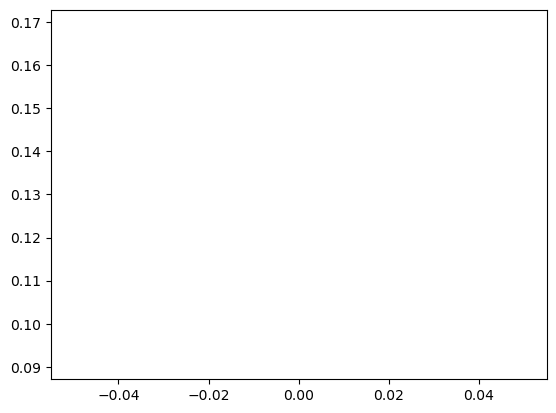

average best of last 100 generations 0.169
generation 2  test set: 8 evaluating performances||||||||||||||||||||| done!  best: 0.167 second: 0.166 third: 0.166
mutating in range: 0.03857805439894609
generation 3  test set: 3 evaluating performances||||||||||||||||||||| done!  best: 0.158 second: 0.158 third: 0.156
mutating in range: 0.0007875492056869604
generation 4  test set: 7 evaluating performances||||||||||||||||||||| done!  best: 0.168 second: 0.168 third: 0.168
mutating in range: 0.04632946596948262
generation 5  test set: 7 evaluating performances||||||||||||||||||||| done!  best: 0.174 second: 0.17 third: 0.169
mutating in range: 0.026711810222878496
generation 6  test set: 6 evaluating performances||||||||||||||||||||| done!  best: 0.155 second: 0.152 third: 0.152
mutating in range: 0.04593498612612707
generation 7  test set: 8 evaluating performances||||||||||||||||||||| done!  best: 0.168 second: 0.167 third: 0.167
mutating in range: 0.03423397781321765
generation 8  test 

/Users/hannes/miniforge3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

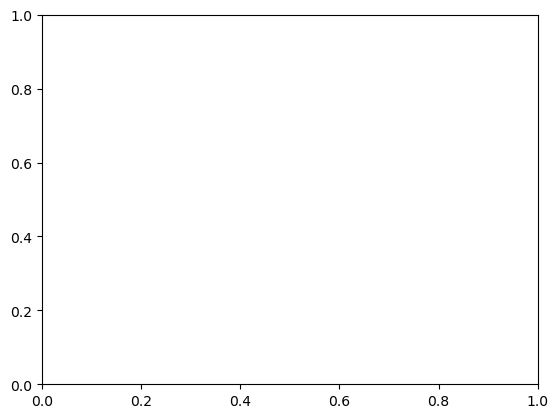

In [18]:
generations = 5000
mutation_range = 0.05
population_size = 20
for gen in range(generations):
    #if(gen%10==0 and gen!=0): 
    #    mutation_range/=1.4
    #    print("decreasing mutation range from",mutation_range*1.4,"to",mutation_range)
    print("generation "+str(len(performance_over_time)+1), end=" ")
    test_set = np.random.randint(10)
    test_sets_used.append(test_set)
    print(" test set:",test_set,end=" ")
    evaluated_networks = evaluate_performance(next_generation, x_test[test_set], y_test_ohe[test_set])
    print(" best:", evaluated_networks[0][0], "second:", evaluated_networks[1][0], "third:", evaluated_networks[2][0])
    performance_over_time.append(list(np.array(evaluated_networks)[:,0]))
    generational_mutation_range = np.random.rand()*mutation_range
    mutation_ranges.append(generational_mutation_range)
    print("mutating in range:", generational_mutation_range)
    next_generation = repopulate(evaluated_networks, generational_mutation_range, n)
    if(gen%10==0):
        plt.plot(performance_over_time, alpha= 0.1)
        plt.plot(np.array(performance_over_time)[:,0])
        plt.show()
        print("average best of last 100 generations",np.average(np.array(performance_over_time)[-100:,0]))
    

In [ ]:
#visualising performance across the 10 different sets

performance_hist = np.array(performance_over_time)[-len(test_sets_used):,0]
set_perf = []
for i in range(10):
    set_perf.append([])

for i in range(len(test_sets_used)):
    set_perf[test_sets_used[i]].append(performance_hist[i])

for i in set_perf:
    plt.plot(i, alpha=0.8)
plt.show()

plt.violinplot(set_perf)
plt.show()

performance_hist = np.array(performance_over_time)[-len(test_sets_used):]
performance_changes = []
for i in range(len(performance_hist)-1):
    performance_changes.append(np.average(performance_hist[i])-np.average(performance_hist[i+1]))

print(np.array(mutation_ranges)[:len(mutation_ranges)].shape)
print(np.array(performance_changes)[:len(mutation_ranges)].shape)

plt.scatter(np.array(performance_changes)[:len(mutation_ranges)], np.array(mutation_ranges)[:len(performance_changes)])
plt.show()
plt.violinplot(np.array(mutation_ranges))
plt.show()

In [ ]:
#TQDM -> loading bars

plt.plot(performance_over_time, alpha= 0.1)
plt.plot(np.array(performance_over_time)[:,0])
#plt.plot(list(0.99*np.ones(len(performance_over_time))))
plt.show()

In [ ]:
plt.plot(np.average(np.split(np.array(performance_over_time)[:6400,0], 40),axis =1))

In [ ]:
log = {"training_run":training_run,
       "neuron_count":neuron_count,
       "connection_probability_dropoff":connection_probability_dropoff,
       "connection_probability_scalar":connection_probability_scalar,
       "input_layer_connectivity_multiplyer":input_layer_connectivity_multiplyer,
       "output_layer_connectivity_multiplyer":output_layer_connectivity_multiplyer,
       "weight_initialisation_range":weight_initialisation_range,
       "distances_from_input_output_layer_to_main_neuron_field":distances_from_input_output_layer_to_main_neuron_field,
       "n_closes_neurons_connection_probability":n_closes_neurons_connection_probability,
       "hidden_neuron_connections" : hidden_neuron_connections,
       "input_neuron_connections" : input_neuron_connections,
       "output_neuron_connections" : output_neuron_connections,
       "inference_steps" : inference_steps,
       "activation_function":activation_function,
       "generation_size":generation_size,
       "n_survivors":n_survivors,
       "mutation_range":mutation_range,
       "training_set_size":training_set_size,
       "mutation_range_reducing_interval":mutation_range_reducing_interval,
       "mutation_range_reducing_factor":mutation_range_reducing_factor,
       "reducing_mutaiton_range":reducing_mutaiton_range,
       "stochastic_mutation_range":stochastic_mutation_range,
       "multiple_training_sets":multiple_training_sets,
       "keep_best_of_n_generations_keep_n_best":keep_best_of_n_generations_keep_n_best,
       "allow_topological_modification":allow_topological_modification,
       "non-uniform_distribution_in_stochastic_mutation_range":non_uniform_distribution_in_stochastic_mutation_range }


In [ ]:
np.savetxt('training_run_'+str(training_run)+'_performance.csv', performance_over_time, delimiter=',')
np.savetxt('training_run_'+str(training_run)+'_test_sets_used.csv', test_sets_used, delimiter=',')
np.savetxt('training_run_'+str(training_run)+'_mutation_ranges.csv', mutation_ranges, delimiter=',')
np.save('training_run_'+str(training_run)+'_config.npy', np.array(log))

In [ ]:
#Ideas to improve GA
#take best of last 3 gens instead of best 3 of last gen
#Cap unused neurons (if collumn or line of adj matrix empty, kill both)
#topology modification